In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

# pandas setting
pd.set_option('display.notebook_', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

%matplotlib inline

# data visualization
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
def warmUpExercise():
    return (np.identity(5))

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [4]:
data = np.loadtxt('linear_regression_data1.txt', delimiter = ',')
data.shape

(97, 2)

In [13]:
x = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]
x[:,1]

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

Text(0, 0.5, 'Profit in $10,000s')

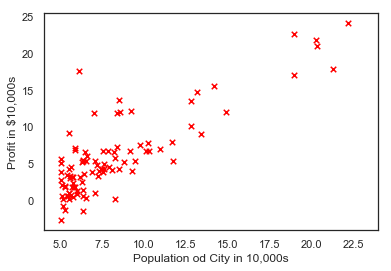

In [8]:
plt.scatter(x[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population od City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [9]:
# 计算损失函数
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1.0/(2*m)*(np.sum(np.square(h-y)))
    
    return J

In [10]:
computeCost(x,y)

32.072733877455676

In [11]:
# 梯度下降
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

In [12]:
theta, Cost_J = gradientDescent(x,y)
print(theta)
print('theta:', theta.ravel())
# .ravel() 讲多维数组转化为一维
# 原本是一列的 change to one row

[[-3.63029144]
 [ 1.16636235]]
theta: [-3.63029144  1.16636235]


Text(0.5,0,'Iterations')

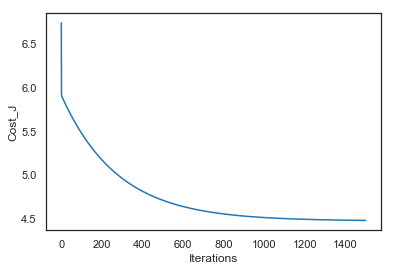

In [15]:
plt.plot(Cost_J)
plt.ylabel('Cost_J')
plt.xlabel('Iterations')

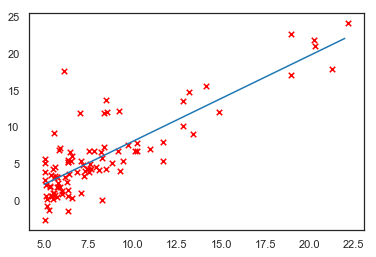

In [15]:
xx = np.arange(5,23) # X轴的范围
yy = theta[0]+theta[1]*xx

plt.scatter(x[:,1], y, s = 30, c ='r', marker='x', linewidths=1)
plt.plot(xx,yy,label='Linear regression')


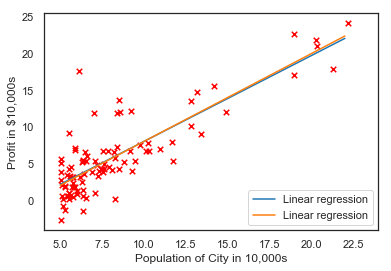

In [18]:
# scikit-learn linear Regression
regr = LinearRegression()
regr.fit(x[:,1].reshape(-1,1), y.ravel())
# .reshape(-1,1)讲原有不知道shape的change to one column
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression')
c

plt.scatter(x[:,1], y, s = 30, c ='r', marker='x', linewidths=1)
plt.plot(xx,yy,label='Linear regression')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc = 4) 
# defining at lower right(4)

In [19]:
# predict the result of the city with the population 35000.70000
print(theta.T.dot([1,3.5])*10000)
print(theta.T.dot([1,7])*10000)

[4519.7678677]
[45342.45012945]
